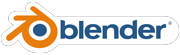

In [ ]:
#@title Render Prefrences { display-mode: "form" }

from os import path

if not path.exists("./blender-2.91.0-linux64.tar.xz"):
  !wget https://download.blender.org/release/Blender2.91/blender-2.91.0-linux64.tar.xz
if not path.exists("./blender-2.91.0-linux64/"):
  !tar xf blender-2.91.0-linux64.tar.xz

!apt install libboost-all-dev
!apt install libgl1-mesa-dev

if not path.exists("/gdrive"):
  from google.colab import drive
  drive.mount('/gdrive')

filepath = "lrf_render/lrf.blend" #@param {type:"string"}
camera_name = "full room 1" #@param {type:"string"}
start_frame = 0 #@param {type:"integer"}
end_frame = 0 #@param {type:"integer"}


# 6. Run Blender
 
filepath_full = "/gdrive/MyDrive/"+filepath.strip("/")
gpu_script = f"'/gdrive/MyDrive/{path.split(filepath)[0]}/GPU.py'"
camera_name_escape_space = f"'{camera_name}'"
camera_name_remove_space = f"{camera_name.replace(' ', '_')}"
camera_script = f"'/gdrive/MyDrive/{path.split(filepath)[0]}/setCamera.py'"
output_path = f"//{camera_name_remove_space}/{camera_name_remove_space}_####"

!sudo ./blender-2.91.0-linux64/blender $filepath_full -b -noaudio -P $gpu_script -P $camera_script -E 'CYCLES' -o $output_path -F 'PNG' -x 1 -s $start_frame -e $end_frame -a -- $camera_name_escape_space